In [1]:
import cnn
from cnn import layers
from cnn import activations

In [2]:
model = cnn.Sequential()

model.add(layers.Conv2D(2, (3, 3), activation=activations.ReLU, input_shape=(5, 5, 1)))
model.add(layers.Pooling(pool_mode="max", pool_size=(3, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(2, activation=activations.ReLU))
model.add(layers.Dense(10, activation=activations.Softmax))

model.summary()


Model: Sequential
Layer (type)                       Output Shape                       Param #       
conv2d_1 (Conv2D)                  (None, 3, 3, 2)                    20               
--------------------------------------------------------------------------------
pooling_1 (Pooling)                (None, 1, 1, 2)                    0                
--------------------------------------------------------------------------------
flatten_1 (Flatten)                (None, 2)                          0                
--------------------------------------------------------------------------------
dense_1 (Dense)                    (None, 2)                          6                
--------------------------------------------------------------------------------
dense_2 (Dense)                    (None, 10)                         30               
Total params: 56



In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = [
    [
        [4, 1, 3, 5, 3],
        [2, 1, 1, 2, 2],
        [5, 5, 1, 2, 3],
        [2, 2, 4, 3, 2],
        [5, 1, 3, 4, 5],
    ],
]

w = [
    [
        [1, 2, 3],
        [4, 7, 5],
        [3, -32, 25],
    ],
    [
        [12, 18, 12],
        [18, -74, 45],
        [-92, 45, -18],
    ],
]

conv2d = layers.Conv2D(2, (3, 3),
                       activation=activations.ReLU,
                       input_shape=(5, 5, 1))

conv2d._weights = w

conv2d.forward_propagation(x)

print('Conv2d 1')
print(conv2d.input_neurons)

x = conv2d.input_neurons

pooling = layers.Pooling(pool_mode="max",
                         pool_size=(3, 3),
                         pool_strides=(1, 1))

pooling.pooling(x)

print('Pooling 1')
print(pooling.input_neurons)

flatten = layers.Flatten()

flatten.flattening(pooling.input_neurons)

print('Flatten')
print(flatten.input_neurons)

dw1 = [[0, 1, 3], [0, 2, -4]]

dense_1 = layers.Dense(2, activation=activations.ReLU)

dense_1.weights = dw1

dense_1.forward_propagation([0] + flatten.input_neurons)

print('Dense 1')
print(np.array(dense_1.input_neurons))

dense_2 = layers.Dense(10, activation=activations.Softmax)

dw2 = [
    [0, 0.09, 0.02],
    [0, 0.08, 0.03],
    [0, 0.07, 0.03],
    [0, 0.06, 0.02],
    [0, 0.05, 0.01],
    [0, 0.04, 0.02],
    [0, 0.03, 0.07],
    [0, 0.04, 0.08],
    [0, 0.05, 0.05],
    [0, 0.01, 0.01],
]

dense_2.weights = dw2

print('Dense 2')
dense_2.forward_propagation([0] + dense_1.input_neurons, 9)

print(dense_2.input_neurons)

Conv2d 1
[[[0, 76, 64], [109, 0, 10], [118, 71, 67]], [[0, 0, 66], [0, 102, 0], [0, 0, 0]]]
Pooling 1
[[[118]], [[102]]]
Flatten
[118, 102]
Dense 1
[424   0]
Dense 2
[0.9855923656977197, 0.014200012528660346, 0.00020458798468002033, 2.94762017927464e-06, 4.2468108451510894e-08, 6.118631729183979e-10, 8.815474859239936e-12, 6.118631729183979e-10, 4.2468108451510894e-08, 1.829904835121683e-15]


In [4]:
x = np.array([
    [
        [4, 1, 3, 5, 3],
        [2, 1, 1, 2, 2],
        [5, 5, 1, 2, 3],
        [2, 2, 4, 3, 2],
        [5, 1, 3, 4, 5],
    ],
])

w = np.array([
    [
        [1, 2, 3],
        [4, 7, 5],
        [3, -32, 25],
    ],
    [
        [12, 18, 12],
        [18, -74, 45],
        [-92, 45, -18],
    ],
])

conv = np.array([[[0, 76, 64], [109, 0, 10], [118, 71, 67]], [[0, 0, 66], [0, 102, 0], [0, 0, 0]]])
pool = np.array([[[118]], [[102]]])
flat = np.array([118, 102])

dense1 = np.array([[1, 424, 0]])

dw1 = np.array([[0, 1, 3], [0, 2, -4]])

dense2 = np.array([[1, 118, 102]])

dw2 = np.array([
    [0, 0.09, 0.02],
    [0, 0.08, 0.03],
    [0, 0.07, 0.03],
    [0, 0.06, 0.02],
    [0, 0.05, 0.01],
    [0, 0.04, 0.02],
    [0, 0.03, 0.07],
    [0, 0.04, 0.08],
    [0, 0.05, 0.05],
    [0, 0.01, 0.01],
])

loss = [0.9855923656977197, 0.014200012528660346, 0.00020458798468002033, 2.94762017927464e-06, 4.2468108451510894e-08, 6.118631729183979e-10, 8.815474859239936e-12, 6.118631729183979e-10, 4.2468108451510894e-08, 1.829904835121683e-15]

loss = np.array(list(map(lambda x: [x], loss)))

# print(x)
# print(w)
# print(dw1)
# print(dw2)
# print(loss)


def dE_dnet(loss, y):
    loss[y] = -(1-loss[y])
    return loss

dE_dnet = dE_dnet(loss, 9)

dE_dw3 = dE_dnet.dot(dense1)

print(dE_dw3)

print()


print(dE_dnet)
# dE_dw2 = dE_dnet * dnet_dReLU2 * dReLU2_dX3 * dX3_dw2
print(dE_dnet.transpose().dot(dw2).transpose().dot(dense2)) 



[[ 9.85592366e-01  4.17891163e+02  0.00000000e+00]
 [ 1.42000125e-02  6.02080531e+00  0.00000000e+00]
 [ 2.04587985e-04  8.67453055e-02  0.00000000e+00]
 [ 2.94762018e-06  1.24979096e-03  0.00000000e+00]
 [ 4.24681085e-08  1.80064780e-05  0.00000000e+00]
 [ 6.11863173e-10  2.59429985e-07  0.00000000e+00]
 [ 8.81547486e-12  3.73776134e-09  0.00000000e+00]
 [ 6.11863173e-10  2.59429985e-07  0.00000000e+00]
 [ 4.24681085e-08  1.80064780e-05  0.00000000e+00]
 [-1.00000000e+00 -4.24000000e+02  0.00000000e+00]]

[[ 9.85592366e-01]
 [ 1.42000125e-02]
 [ 2.04587985e-04]
 [ 2.94762018e-06]
 [ 4.24681085e-08]
 [ 6.11863173e-10]
 [ 8.81547486e-12]
 [ 6.11863173e-10]
 [ 4.24681085e-08]
 [-1.00000000e+00]]
[[0.         0.         0.        ]
 [0.07985382 9.42275031 8.14508926]
 [0.01014405 1.19699753 1.03469278]]


In [5]:
np.array([[1,2], [3,4]]) * np.array([[1,2], [3,4]])

array([[ 1,  4],
       [ 9, 16]])

In [6]:
from keras.datasets import mnist

Print Sample:


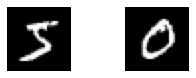


Model: Sequential
Layer (type)                       Output Shape                       Param #       
conv2d_1 (Conv2D)                  (None, 28, 28, 6)                  156              
--------------------------------------------------------------------------------
pooling_1 (Pooling)                (None, 14, 14, 6)                  0                
--------------------------------------------------------------------------------
conv2d_2 (Conv2D)                  (None, 12, 12, 16)                 880              
--------------------------------------------------------------------------------
pooling_2 (Pooling)                (None, 6, 6, 16)                   0                
--------------------------------------------------------------------------------
flatten_1 (Flatten)                (None, 576)                        0                
--------------------------------------------------------------------------------
dense_1 (Dense)                    (None, 120)     

In [7]:
img_rows, img_cols = 28, 28

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.array(X_train)
X_train = np.pad(X_train, ((0, 0), (2, 2), (2, 2)), 'constant').tolist()

for i in range(2):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
    
for i in range(len(X_train)):
    for j in range(len(X_train[i])):
        for k in range(len(X_train[i][j])):
            X_train[i][j][k] /= 255

print("Print Sample:")
plt.show()

lenet5 = cnn.Sequential()

lenet5.add(
    layers.Conv2D(6, (5, 5),
                  activation=activations.ReLU,
                  input_shape=(32, 32, 1)))
lenet5.add(layers.Pooling(pool_mode="average"))
lenet5.add(layers.Conv2D(16, (3, 3), activation=activations.ReLU))
lenet5.add(layers.Pooling(pool_mode="average"))
lenet5.add(layers.Flatten())
lenet5.add(layers.Dense(120, activation=activations.ReLU))
lenet5.add(layers.Dense(84, activation=activations.ReLU))
lenet5.add(layers.Dense(10, activation=activations.Softmax))

lenet5.summary()

X_train = list(map(lambda x: [x], X_train))

lenet5.forward_propagation(X_train[0], 0)
print(np.array(lenet5.layers[-1].input_neurons))
print()

lenet5.forward_propagation(X_train[1], 0)
print(np.array(lenet5.layers[-1].input_neurons))
print()


In [8]:
lenet5.weights_summary()

conv2d_1 (6, 5, 5)
[[[ 1.32808995e-02 -5.86133416e-03  1.98826005e-02  2.10893815e-03
    6.99996415e-03]
  [ 4.06049177e-02 -1.65529504e-02  4.71340861e-02 -4.02379478e-02
   -1.75373580e-02]
  [-3.85841004e-02 -4.31393690e-02  4.69698349e-02 -2.27501897e-02
    2.30664208e-02]
  [ 9.78635780e-03 -4.47702098e-02  2.29992150e-02  2.01985253e-03
   -1.24957649e-02]
  [ 1.46807441e-02 -1.22790247e-02  3.03489258e-02 -4.89620627e-03
   -2.73215609e-02]]

 [[-1.76581520e-02 -3.11981319e-02 -5.00377708e-03  8.14195690e-02
   -2.75614217e-02]
  [-1.12401309e-03  1.80860041e-02  2.07630610e-03  2.78268047e-02
    3.42934365e-03]
  [-1.50090405e-02  9.77497041e-03  1.14791245e-03 -4.54222973e-02
   -2.66750542e-02]
  [-3.36795665e-02 -1.22293884e-02  6.31445381e-03 -2.06683864e-02
   -1.54919774e-02]
  [ 4.45104783e-02 -6.01304244e-02 -3.18642492e-03  5.92445228e-03
    3.13672222e-02]]

 [[-1.85546516e-03 -2.60091766e-03 -1.32026232e-02  4.50003118e-03
    3.00754329e-02]
  [ 1.79238825e-02 -

In [9]:
lenet5.fit(X_train, y_train, 600, 3)

Epoch 1/3
[100/100] [==============================] 
Epoch 2/3
[100/100] [==============================] 
Epoch 3/3
[100/100] [==============================] 


In [10]:
print(y_train[:100])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


In [11]:
import sys

sys.maxsize

9223372036854775807

In [12]:
# Epoch 1/3
# 90/90 [==============================] - 16s 173ms/step - loss: 0.2099 - accuracy: 0.9377 - val_loss: 0.1032 - val_accuracy: 0.9725
# Epoch 2/3
# 90/90 [==============================] - 29s 319ms/step - loss: 0.1362 - accuracy: 0.9591 - val_loss: 0.0776 - val_accuracy: 0.9785
# Epoch 3/3
# 90/90 [==============================] - 23s 252ms/step - loss: 0.1097 - accuracy: 0.9665 - val_loss: 0.0625 - val_accuracy: 0.9835

In [13]:
# import numpy as np
# from tensorflow import keras
# from tensorflow.keras import layers

In [14]:
# # Model / data parameters
# num_classes = 10
# input_shape = (28, 28, 1)

# # the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# # Scale images to the [0, 1] range
# x_train = x_train.astype("float32") / 255
# x_test = x_test.astype("float32") / 255
# # Make sure images have shape (28, 28, 1)
# x_train = np.expand_dims(x_train, -1)
# x_test = np.expand_dims(x_test, -1)
# print("x_train shape:", x_train.shape)
# print(x_train.shape[0], "train samples")
# print(x_test.shape[0], "test samples")


# # convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

In [15]:
# model = keras.Sequential(
#     [
#         keras.Input(shape=input_shape),
#         layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Flatten(),
#         layers.Dropout(0.5),
#         layers.Dense(num_classes, activation="softmax"),
#     ]
# )

# model.summary()

In [16]:
# batch_size = 600
# epochs = 3

# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [17]:
# score = model.evaluate(x_test, y_test, verbose=0)
# print("Test loss:", score[0])
# print("Test accuracy:", score[1])